In [29]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

RAND_SEED = 7
ITER_LIST = 2 ** np.arange(12)
MAX_ATTEMPTS = 200
OUTPUT_DIR = 'out'

In [30]:
def run_algo(problem, name_problem):
    rhc_stats, rhc_curve = mlrose.runners.RHCRunner(
        problem=problem,
        experiment_name= 'RHC_' + name_problem,
        seed=RAND_SEED,
        iteration_list= ITER_LIST,
        max_attempts=MAX_ATTEMPTS,
        restart_list=[25,75,100],
        output_directory=OUTPUT_DIR
    ).run()
    
    sa_stats, sa_curve = mlrose.runners.SARunner(
        problem=problem,
        experiment_name = 'SA_' + name_problem,
        seed=RAND_SEED,
        iteration_list= ITER_LIST,
        max_attempts = MAX_ATTEMPTS,
        temperature_list=[0.1, 0.5, 1, 10, 50, 100, 250, 500, 1000, 2500],
        decay_list=[mlrose.GeomDecay],
        output_directory=OUTPUT_DIR
    ).run()
    
    ga_stats, ga_curve = mlrose.runners.GARunner(
        problem=problem,
        experiment_name = 'GA_' + name_problem,
        seed=RAND_SEED,
        iteration_list=ITER_LIST,
        max_attempts=MAX_ATTEMPTS,
        population_sizes=[150, 200, 300],
        mutation_rates=[0.4, 0.5, 0.6],
        output_directory=OUTPUT_DIR
    ).run()
    
    mc_stats, mc_curve = mlrose.runners.MIMICRunner(
        problem=problem,
        experiment_name='MIMIC_' + name_problem,
        seed=RAND_SEED,
        iteration_list=ITER_LIST,
        max_attempts=MAX_ATTEMPTS,
        keep_percent_list=[0.25, 0.5, 0.75],
        population_sizes=[150, 200, 300],
        output_directory=OUTPUT_DIR
    ).run()
    
    return [[rhc_stats, rhc_curve], [sa_stats, sa_curve], [ga_stats, ga_curve], [mc_stats, mc_curve]]

In [65]:
def plot_curves(stats, name_problem, max_value=True):
    [[rhc_stats, rhc_curve], [sa_stats, sa_curve], [ga_stats, ga_curve], [mc_stats, mc_curve]] = stats
    
    plt.plot(rhc_curve['Iteration'], rhc_curve['Fitness'] if max_value else -1 * rhc_curve['Fitness'], label='RHC')
    plt.plot(sa_curve['Iteration'], sa_curve['Fitness'] if max_value else -1 * sa_curve['Fitness'], label='SA')
    plt.plot(ga_curve['Iteration'], ga_curve['Fitness'] if max_value else -1 * ga_curve['Fitness'], label='GA')
    plt.plot(mc_curve['Iteration'], mc_curve['Fitness'] if max_value else -1 * mc_curve['Fitness'], label='MIMIC')
    plt.legend(loc="best")
    plt.xlabel("No of iterations")
    plt.ylabel("Fitness value")
    plt.title(name_problem + ' Iteration vs Fitness')
    plt.show()
    
    sa_index = sa_stats[['Fitness']].idxmax() if max_value else sa_stats[['Fitness']].idxmin()
    schedule_type = sa_stats.iloc[sa_index]['schedule_type'].values[0]
    schedule_init_temp = sa_stats.iloc[sa_index]['schedule_init_temp'].values[0]
    print("Simulated Annealing", schedule_type, schedule_init_temp)
    sa_best = sa_stats[(sa_stats.schedule_type == schedule_type) & (sa_stats.schedule_init_temp == schedule_init_temp)]
    
    rhc_index = rhc_stats[['Fitness']].idxmax() if max_value else rhc_stats[['Fitness']].idxmin()
    current_restart = rhc_stats.iloc[rhc_index]['current_restart'].values[0]
    Restarts = rhc_stats.iloc[rhc_index]['Restarts'].values[0]
    print("Random Hill Climb", current_restart, Restarts)
    rhc_best = rhc_stats[(rhc_stats.current_restart == current_restart) & (rhc_stats.Restarts == Restarts)]
    
    ga_index = ga_stats[['Fitness']].idxmax() if max_value else ga_stats[['Fitness']].idxmin()
    pop_size = ga_stats.iloc[ga_index]['Population Size'].values[0]
    mut_rate = ga_stats.iloc[ga_index]['Mutation Rate'].values[0]
    print("Genetic Algorithm", pop_size, mut_rate)
    ga_best = ga_stats[(ga_stats['Population Size'] == pop_size) & (ga_stats['Mutation Rate'] == mut_rate)]
    
    mc_index = mc_stats[['Fitness']].idxmax() if max_value else mc_stats[['Fitness']].idxmin()
    pop_size = mc_stats.iloc[mc_index]['Population Size'].values[0]
    keep_percent = mc_stats.iloc[mc_index]['Keep Percent'].values[0]
    print("MIMIC", pop_size, keep_percent)
    mc_best = mc_stats[(mc_stats['Population Size'] == pop_size) & (mc_stats['Keep Percent'] == keep_percent)]
    
    plt.plot(rhc_best['Iteration'], rhc_best['Fitness'] if max_value else -1 * rhc_best['Fitness'], label='RHC')
    plt.plot(sa_best['Iteration'], sa_best['Fitness'] if max_value else -1 * sa_best['Fitness'], label='SA')
    plt.plot(ga_best['Iteration'], ga_best['Fitness'] if max_value else -1 * ga_best['Fitness'], label='GA')
    plt.plot(mc_best['Iteration'], mc_best['Fitness'] if max_value else -1 * mc_best['Fitness'], label='MIMIC')
    plt.legend(loc="best")
    plt.xlabel("No of iterations")
    plt.ylabel("Fitness value")
    plt.title(name_problem + ' best fitness Iteration vs Fitness')
    plt.show()
    
    plt.plot(rhc_best['Iteration'], rhc_best['Time'], label='RHC')
    plt.plot(sa_best['Iteration'], sa_best['Time'], label='SA')
    plt.plot(ga_best['Iteration'], ga_best['Time'], label='GA')
    plt.plot(mc_best['Iteration'], mc_best['Time'], label='MIMIC')
    plt.legend(loc="best")
    plt.xlabel("No of iterations")
    plt.ylabel("Time")
    plt.title(name_problem + ' best fitness Iteration vs Time')
    plt.show()
    
    plt.plot(rhc_best['Iteration'], rhc_best['FEvals'], label='RHC')
    plt.plot(sa_best['Iteration'], sa_best['FEvals'], label='SA')
    plt.plot(ga_best['Iteration'], ga_best['FEvals'], label='GA')
    plt.plot(mc_best['Iteration'], mc_best['FEvals'], label='MIMIC')
    plt.legend(loc="best")
    plt.xlabel("No of iterations")
    plt.ylabel("FEvals")
    plt.title(name_problem + ' best fitness Iteration vs FEvals')
    plt.show()

In [52]:
problem = mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=20)
flip_stats = run_algo(problem, 'Flip Flop')

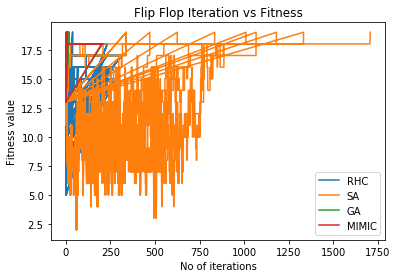

Simulated Annealing geometric 0.1
Random Hill Climb 33 75
Genetic Algorithm 150 0.5
MIMIC 150 0.25


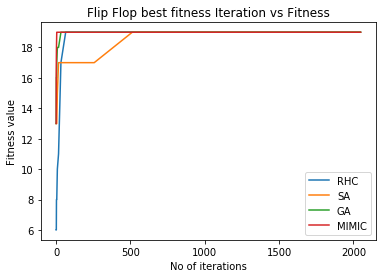

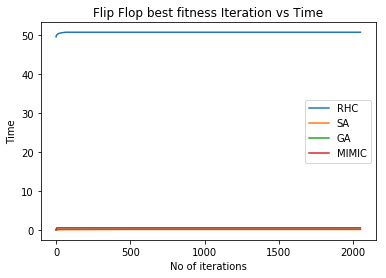

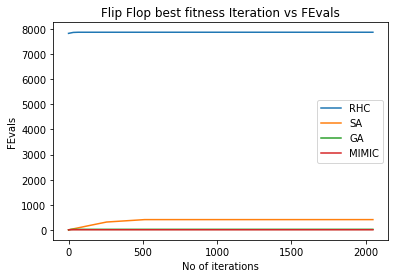

In [66]:
plot_curves(flip_stats, 'Flip Flop')

In [50]:
problem = mlrose.generators.QueensGenerator.generate(seed=RAND_SEED, size=16)
q_stats = run_algo(problem, 'Queens')

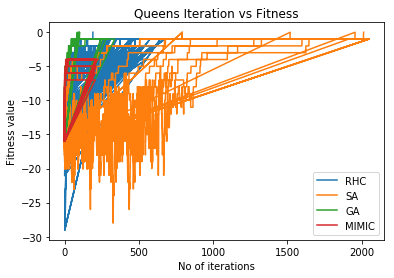

Simulated Annealing geometric 0.1
Random Hill Climb 95 100
Genetic Algorithm 150 0.4
MIMIC 150 0.5


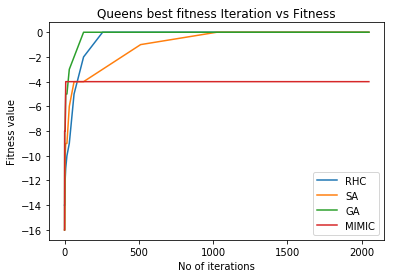

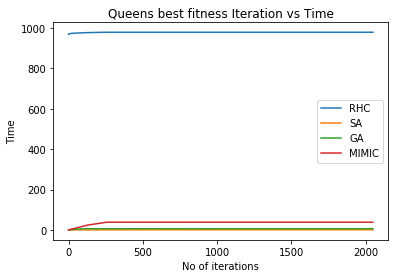

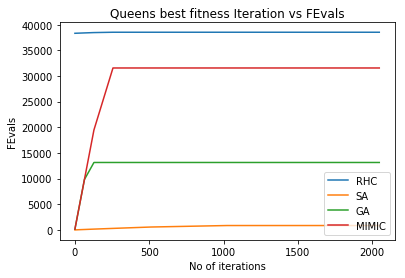

In [67]:
plot_curves(q_stats, 'Queens', False)

In [69]:
problem = mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=40)
cont_stats = run_algo(problem, 'ContinuousPeaks')

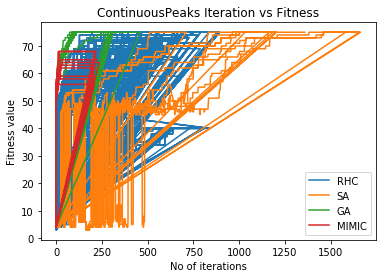

Simulated Annealing geometric 0.1
Random Hill Climb 3 25
Genetic Algorithm 150 0.4
MIMIC 200 0.5


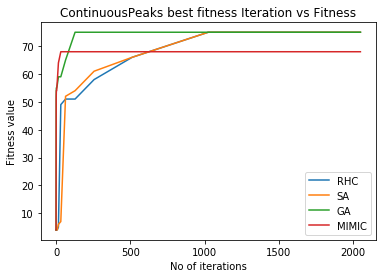

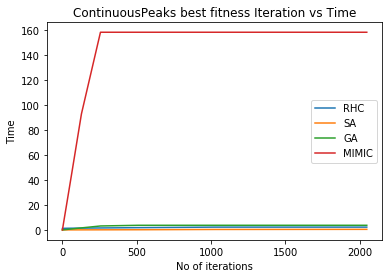

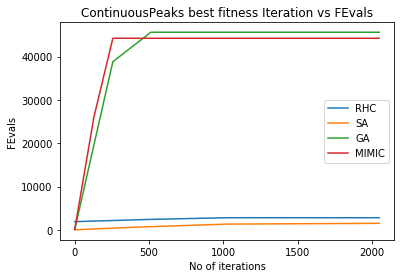

In [70]:
plot_curves(cont_stats, 'ContinuousPeaks')

In [32]:
def problem_size_comparison(problems, name_problem, max_value = True):
    rhc_data = []
    sa_data = []
    ga_data = []
    mimic_data = []
    for problem in problems:
        rhc_stats, rhc_curve = mlrose.runners.RHCRunner(
            problem=problem['problem'],
            experiment_name= 'RHC_' + problem['size'] + '_' + name_problem,
            seed=RAND_SEED,
            iteration_list= ITER_LIST,
            max_attempts=MAX_ATTEMPTS,
            restart_list=[50],
            output_directory=OUTPUT_DIR
        ).run()
        rhc_data.append({'Problem Size': problem['size'], 'Fitness': rhc_stats[['Fitness']].max() if max_value else rhc_stats[['Fitness']].min()})
        
        
        rhc_stats, rhc_curve = mlrose.runners.SARunner(
            problem=problem['problem'],
            experiment_name = 'SA_' + problem['size'] + '_' + name_problem,
            seed=RAND_SEED,
            iteration_list= ITER_LIST,
            max_attempts = MAX_ATTEMPTS,
            temperature_list=[5],
            decay_list=[mlrose.GeomDecay],
            output_directory=OUTPUT_DIR
        ).run()
        sa_data.append({'Problem Size': problem['size'], 'Fitness': rhc_stats[['Fitness']].max() if max_value else rhc_stats[['Fitness']].min()})
        
        rhc_stats, rhc_curve = mlrose.runners.GARunner(
            problem=problem['problem'],
            experiment_name = 'GA_' + problem['size'] + '_' + name_problem,
            seed=RAND_SEED,
            iteration_list=ITER_LIST,
            max_attempts=MAX_ATTEMPTS,
            population_sizes=[150],
            mutation_rates=[0.4],
            output_directory=OUTPUT_DIR
        ).run()
        ga_data.append({'Problem Size': problem['size'], 'Fitness': rhc_stats[['Fitness']].max() if max_value else rhc_stats[['Fitness']].min()})
        
        
        rhc_stats, rhc_curve = mlrose.runners.MIMICRunner(
            problem=problem['problem'],
            experiment_name='MIMIC_' + problem['size'] + '_' + name_problem,
            seed=RAND_SEED,
            iteration_list=ITER_LIST,
            max_attempts=MAX_ATTEMPTS,
            keep_percent_list=[0.25],
            population_sizes=[150],
            output_directory=OUTPUT_DIR
        ).run()
        
        mimic_data.append({'Problem Size': problem['size'], 'Fitness': rhc_stats[['Fitness']].max() if max_value else rhc_stats[['Fitness']].min()})
        
    return [rhc_data, sa_data, ga_data, mimic_data]

In [40]:
def plot_problem_size_graphs(data, name_problem, max_value = True):
    [rhc_data, sa_data, ga_data, mimic_data] = data
    rhc_pd = pd.DataFrame(rhc_data)
    sa_pd = pd.DataFrame(sa_data)
    ga_pd = pd.DataFrame(ga_data)
    mimic_pd = pd.DataFrame(mimic_data)
    
    
    plt.plot(rhc_pd['Problem Size'], rhc_pd['Fitness'] if max_value else -1 * rhc_pd['Fitness'], label='RHC')
    plt.plot(sa_pd['Problem Size'], sa_pd['Fitness'] if max_value else -1 * sa_pd['Fitness'], label='SA')
    plt.plot(ga_pd['Problem Size'], ga_pd['Fitness'] if max_value else -1 * ga_pd['Fitness'], label='GA')
    plt.plot(mimic_pd['Problem Size'], mimic_pd['Fitness'] if max_value else -1 * mimic_pd['Fitness'], label='MIMIC')
    plt.legend(loc="best")
    plt.xlabel("Problem Size")
    plt.ylabel("Fitness value")
    plt.title(name_problem + ' Problem Size vs Fitness')
    plt.show()

In [54]:
problems = [
    {
        'size': '10',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=10)
    },
    {
        'size': '20',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=20)
    },
    {
        'size': '40',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=40)
    },
    {
        'size': '60',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=60)
    },
    {
        'size': '80',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=80)
    },
    {
        'size': '100',
        'problem': mlrose.generators.FlipFlopGenerator.generate(seed=2*RAND_SEED, size=100)
    }
]
flip_multi_stats = problem_size_comparison(problems, 'Flip Flop')

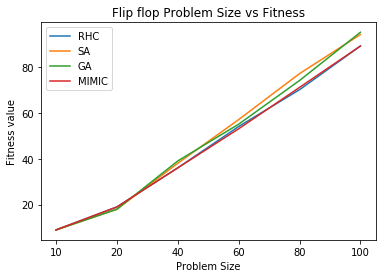

In [56]:
plot_problem_size_graphs(flip_multi_stats, 'Flip flop')

In [34]:
problems = [
    {
        'size': '8',
        'problem': mlrose.generators.QueensGenerator.generate(seed=RAND_SEED, size=8)
    },
    {
        'size': '16',
        'problem': mlrose.generators.QueensGenerator.generate(seed=RAND_SEED, size=16)
    },
    {
        'size': '32',
        'problem': mlrose.generators.QueensGenerator.generate(seed=RAND_SEED, size=32)
    },
    {
        'size': '64',
        'problem': mlrose.generators.QueensGenerator.generate(seed=RAND_SEED, size=64)
    }
]
q_multi_stats = problem_size_comparison(problems, 'Queens', False)

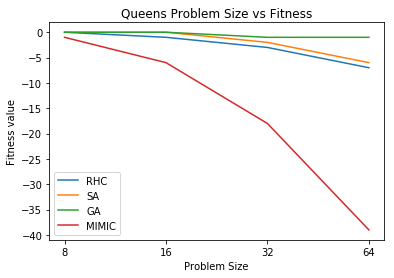

In [41]:
plot_problem_size_graphs(q_multi_stats, 'Queens', False)

In [38]:
problems = [
    {
        'size': '10',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=10)
    },
    {
        'size': '20',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=20)
    },
    {
        'size': '40',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=40)
    },
    {
        'size': '60',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=60)
    },
    {
        'size': '80',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=80)
    },
    {
        'size': '100',
        'problem': mlrose.generators.ContinuousPeaksGenerator.generate(seed=RAND_SEED, size=100)
    }
]
peaks_multi_stats = problem_size_comparison(problems, 'Continous Peaks')

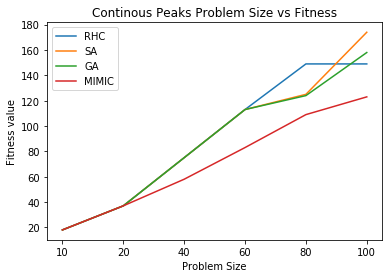

In [39]:
plot_problem_size_graphs(peaks_multi_stats, 'Continous Peaks')

# Part 2

In [2]:
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import f1_score, balanced_accuracy_score, make_scorer

def get_grid_search_params(clf, X, y, param_grid):
    kf = KFold (n_splits=7, random_state=RAND_SEED, shuffle=True)
    gscv = GridSearchCV(clf, cv=kf, param_grid=param_grid,scoring='f1_micro',n_jobs=-1,verbose=2)
    gscv.fit(X,y)
    return gscv.best_params_

def create_learning_curve(clf, x, y, title, train_sizes=np.linspace(.1, 1.0, 10)):
    train_sizes_abs, train_scores, test_scores, fit_times, score_times = learning_curve(clf, x, y, cv=None, train_sizes=train_sizes, n_jobs=-1, return_times=True,verbose=2, scoring='f1_micro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    
    _, axes = plt.subplots(2, 1, figsize=(10, 15))

    axes[0].set_title(title)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    
    axes[0].grid()
    axes[0].fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes_abs, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes_abs, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1, color='r')
    axes[1].fill_between(train_sizes_abs, score_times_mean - score_times_std,
                         score_times_mean + score_times_std, alpha=0.1, color='g')
    axes[1].plot(train_sizes_abs, fit_times_mean, 'o-', color="r",
                 label="Fit Time")
    axes[1].plot(train_sizes_abs, score_times_mean, 'o-', color="g",
                 label="Score time")
    axes[1].legend(loc="best")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()


In [3]:
def return_car_transform(df):
    def trasform_high_to_int(value):
        if (value == 'vhigh'):
            return 1
        elif (value == 'high' or value == 'big'):
            return 2
        elif (value == 'med'):
            return 3
        elif (value == 'low' or value == 'small'):
            return 4

    def transform_more_to_int(value):
        if (value == '5more' or value == 'more'):
            return 5
        else:
            return int(value)

    def car_status_to_int(value):
        if (value == 'unacc'):
            return 1
        elif (value == 'acc'):
            return 2
        elif(value == 'good'):
            return 3
        elif(value == 'vgood'):
            return 4

    df['buying'] = df['buying'].transform(lambda x: trasform_high_to_int(x))
    df['maint'] = df['maint'].transform(lambda x: trasform_high_to_int(x))
    df['lug_boot'] = df['lug_boot'].transform(lambda x: trasform_high_to_int(x))
    df['safety'] = df['safety'].transform(lambda x: trasform_high_to_int(x))
    df['doors'] = df['doors'].transform(lambda x: transform_more_to_int(x))
    df['persons'] = df['persons'].transform(lambda x: transform_more_to_int(x))
    df['car_status'] = df['car_status'].transform(lambda x: car_status_to_int(x))
    
    return df

In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
def run_car_data_original_classifier():
    df = pd.read_csv('car.csv', delimiter=',')
    df = return_car_transform(df)
    X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
    y = df[['car_status']].values.ravel()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=RAND_SEED, shuffle=True)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    one_hot = OneHotEncoder()
    y_train_hot = one_hot.fit_transform(Y_train.reshape(-1, 1)).todense()
    y_test_hot = one_hot.transform(Y_test.reshape(-1, 1)).todense()
    
    # Neural Network
    return X_train_scaled, X_test_scaled, y_train_hot, y_test_hot

X_train, X_test, Y_train, Y_test = run_car_data_original_classifier()

In [8]:
grid_params = {
    'hidden_nodes': [[20], [40], [50], [80], [100]],
    'learning_rate': [0.0001,0.0005,0.001,0.005,0.01]
}
gd_clf = mlrose.NeuralNetwork(algorithm='gradient_descent', max_iters=2000, is_classifier=True, random_state=RAND_SEED, max_attempts=MAX_ATTEMPTS, curve=True)
params = get_grid_search_params(gd_clf, X_train, Y_train, grid_params)
display(params)

Fitting 7 folds for each of 25 candidates, totalling 175 fits


{'hidden_nodes': [80], 'learning_rate': 0.001}

[learning_curve] Training set sizes: [ 103  207  310  414  518  621  725  828  932 1036]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:  5.2min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.0min finished


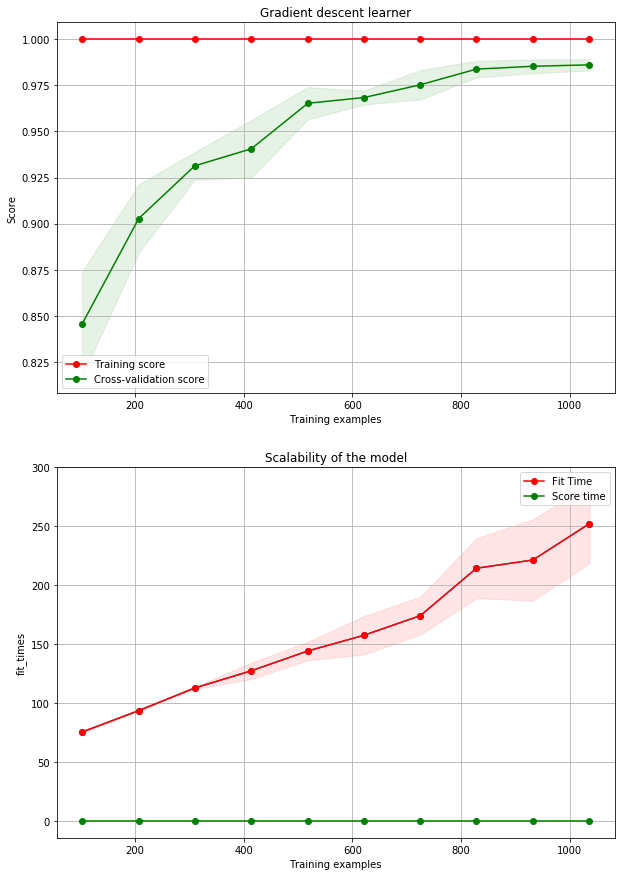

NeuralNetwork(algorithm='gradient_descent', curve=True, hidden_nodes=[80],
              learning_rate=0.001, max_attempts=200, max_iters=20000,
              random_state=7)

In [11]:
nn_clf = mlrose.NeuralNetwork(learning_rate=params['learning_rate'], hidden_nodes=params['hidden_nodes'], algorithm='gradient_descent', max_iters=5000, is_classifier=True, random_state=RAND_SEED, max_attempts=MAX_ATTEMPTS, curve=True)
create_learning_curve(nn_clf, X_train, Y_train, 'Gradient descent learner')
nn_clf.fit(X_train, Y_train)

[learning_curve] Training set sizes: [ 103  207  310  414  518  621  725  828  932 1036]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:  3.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.0min finished


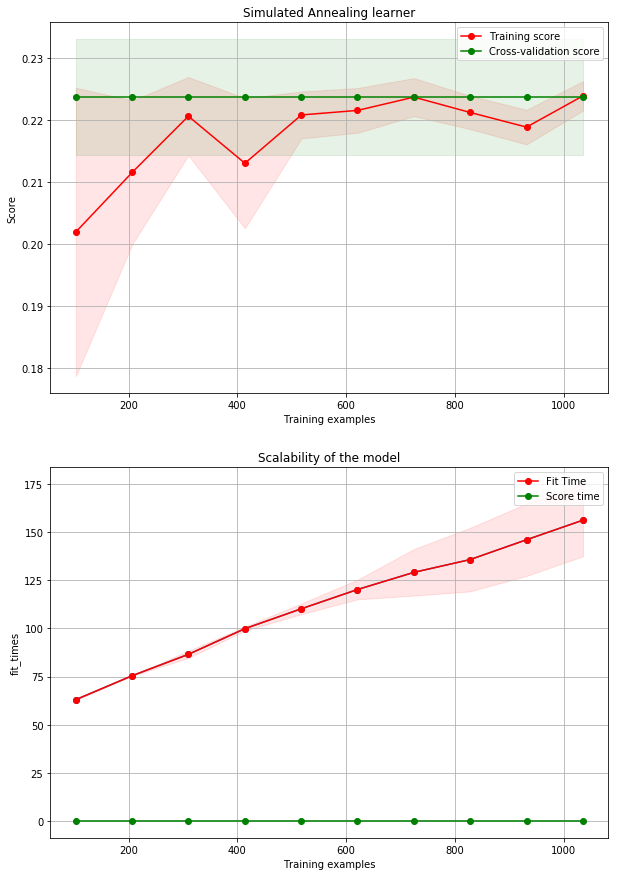

NeuralNetwork(algorithm='simulated_annealing', curve=True, hidden_nodes=[80],
              learning_rate=0.001, max_attempts=200, max_iters=20000,
              random_state=7)

In [25]:
sa_clf = mlrose.NeuralNetwork(learning_rate=params['learning_rate'], hidden_nodes=params['hidden_nodes'], algorithm='simulated_annealing', max_iters=20000, is_classifier=True, random_state=RAND_SEED, max_attempts=MAX_ATTEMPTS, schedule=mlrose.GeomDecay(), curve=True)
create_learning_curve(sa_clf, X_train, Y_train, 'Simulated Annealing learner')
sa_clf.fit(X_train, Y_train)

[learning_curve] Training set sizes: [ 103  207  310  414  518  621  725  828  932 1036]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed: 180.3min remaining: 180.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 323.1min finished


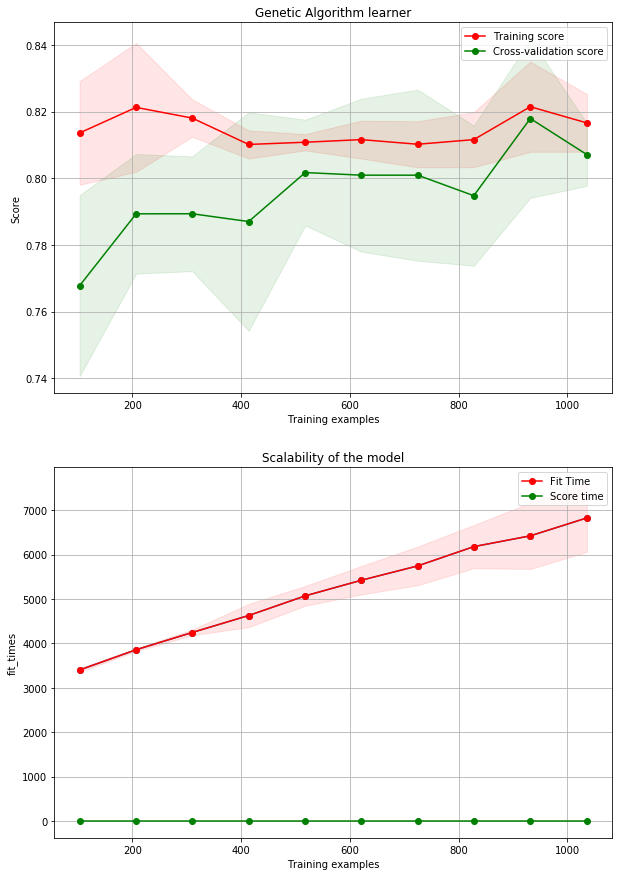

NeuralNetwork(algorithm='genetic_alg', curve=True, hidden_nodes=[80],
              learning_rate=0.001, max_attempts=200, max_iters=5000,
              mutation_prob=0.4, pop_size=300, random_state=7)

In [9]:
ga_clf = mlrose.NeuralNetwork(learning_rate=params['learning_rate'], hidden_nodes=params['hidden_nodes'], algorithm='genetic_alg', max_iters=5000, is_classifier=True, random_state=RAND_SEED, max_attempts=MAX_ATTEMPTS, pop_size=300, mutation_prob=0.4, curve=True)
create_learning_curve(ga_clf, X_train, Y_train, 'Genetic Algorithm learner')
ga_clf.fit(X_train, Y_train)

[learning_curve] Training set sizes: [ 103  207  310  414  518  621  725  828  932 1036]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed: 14.6min remaining: 14.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.2min finished


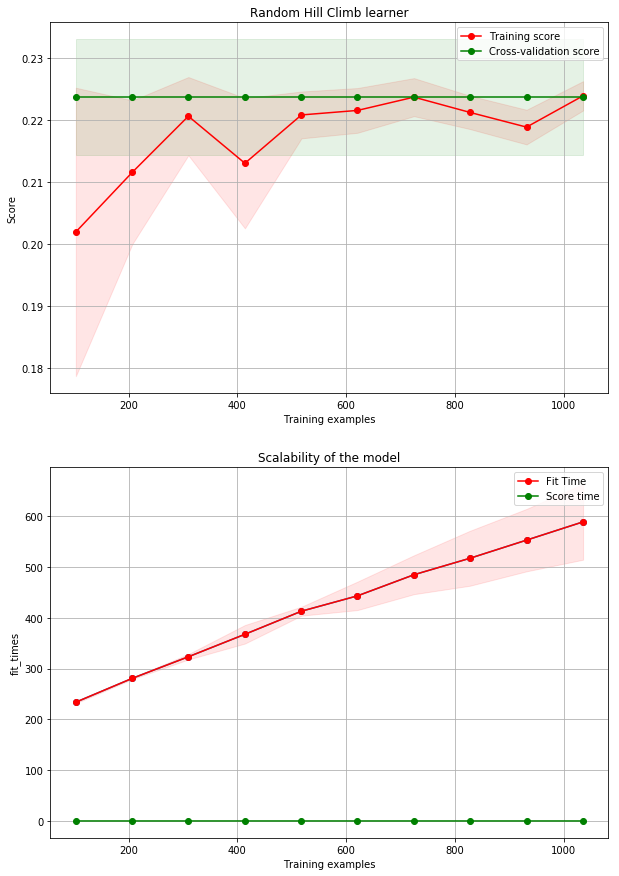

NeuralNetwork(curve=True, hidden_nodes=[80], learning_rate=0.001,
              max_attempts=200, max_iters=20000, random_state=7, restarts=4)

In [24]:
rhc_clf = mlrose.NeuralNetwork(learning_rate=params['learning_rate'], hidden_nodes=params['hidden_nodes'], algorithm='random_hill_climb', max_iters=20000, is_classifier=True, random_state=RAND_SEED, max_attempts=MAX_ATTEMPTS, restarts = 4, curve=True)
create_learning_curve(rhc_clf, X_train, Y_train, 'Random Hill Climb learner')
rhc_clf.fit(X_train, Y_train)

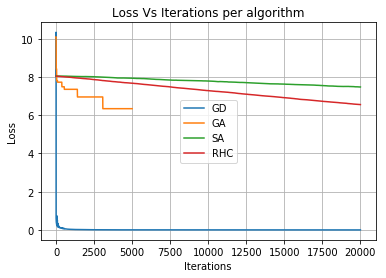

In [27]:
plt.plot(-1 * nn_clf.fitness_curve, label="GD")
plt.plot(ga_clf.fitness_curve[:,0], label="GA")
plt.plot(sa_clf.fitness_curve[:,0], label="SA")
plt.plot(rhc_clf.fitness_curve[:,0], label = "RHC")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.title("Loss Vs Iterations per algorithm")
plt.show()

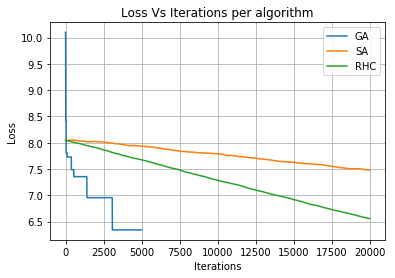

In [28]:
plt.plot(ga_clf.fitness_curve[:,0], label="GA")
plt.plot(sa_clf.fitness_curve[:,0], label="SA")
plt.plot(rhc_clf.fitness_curve[:,0], label = "RHC")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.title("Loss Vs Iterations per algorithm")
plt.show()